In [271]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import yaml
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit

from src.data_loader import load_as_sales_data
from src.data_features import build_features
from src.model import cross_validate_model
from src.evaluation import evaluate_cross_val

In [280]:
config_path = "./best_config.yaml"
with open(config_path) as f:
        config = yaml.safe_load(f)

train_pl = load_as_sales_data(config["dataset_path"])

X, Y = build_features(train_pl, config)
X.shape, Y.shape

((30, 16), (30, 7))

In [274]:
ts_cv = TimeSeriesSplit(n_splits=3)

for i, (train_index, test_index) in enumerate(ts_cv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3 4 5 6 7 8]
  Test:  index=[ 9 10 11 12 13 14 15]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
  Test:  index=[23 24 25 26 27 28 29]


In [275]:
baseline_config = {"model_type": "baseline",
                  "model_params": {"method": "mean"}}
baseline_results = cross_validate_model(X[:,:config["time_input_length"]], Y, baseline_config)
evaluate_cross_val(baseline_results)

{'CV FOLD 0': {'RMSE': 1541.7119937456976, 'MAPE': 2.2584224308322485},
 'CV FOLD 1': {'RMSE': 1496.011038124641, 'MAPE': 2.2193344918501112},
 'CV FOLD 2': {'RMSE': 1338.8909168747505, 'MAPE': 1.8989073624030561},
 'AVG': {'RMSE': 1463.5271487607986, 'MAPE': 2.125554761695139}}

In [276]:
linear_config = {"model_type": "linear"}
linear_results = cross_validate_model(X, Y, linear_config)
evaluate_cross_val(linear_results)

{'CV FOLD 0': {'RMSE': 433.5981782434818, 'MAPE': 0.16394123601439087},
 'CV FOLD 1': {'RMSE': 938.3549878561079, 'MAPE': 0.26270254757960404},
 'CV FOLD 2': {'RMSE': 532.6240241928972, 'MAPE': 0.18121188096956234},
 'AVG': {'RMSE': 690.5995717537019, 'MAPE': 0.2026185548545191}}

In [278]:
results = cross_validate_model(X, Y, config)
evaluate_cross_val(results)

{'CV FOLD 0': {'RMSE': 211.98063971945632, 'MAPE': 0.06556785901964543},
 'CV FOLD 1': {'RMSE': 257.2600610252399, 'MAPE': 0.089719700326808},
 'CV FOLD 2': {'RMSE': 353.2202938153745, 'MAPE': 0.11500823096844737},
 'AVG': {'RMSE': 291.58854740292855, 'MAPE': 0.0900985967716336}}

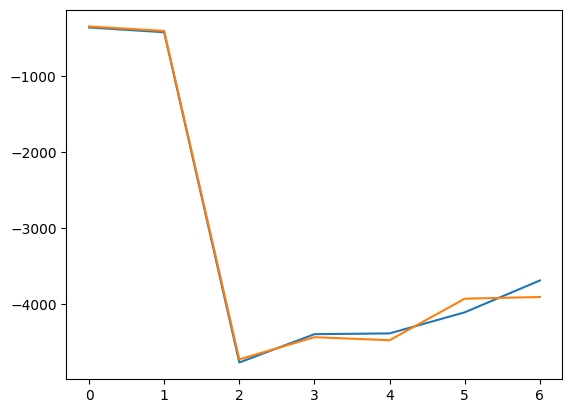

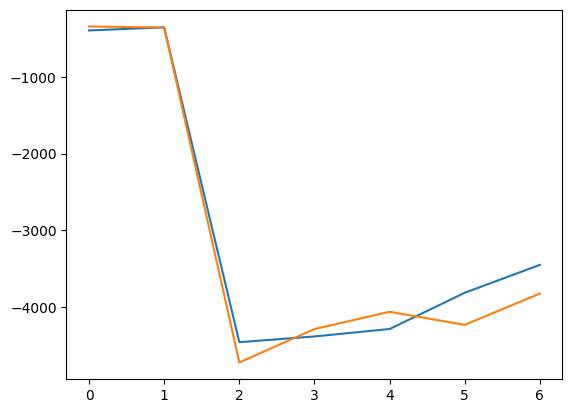

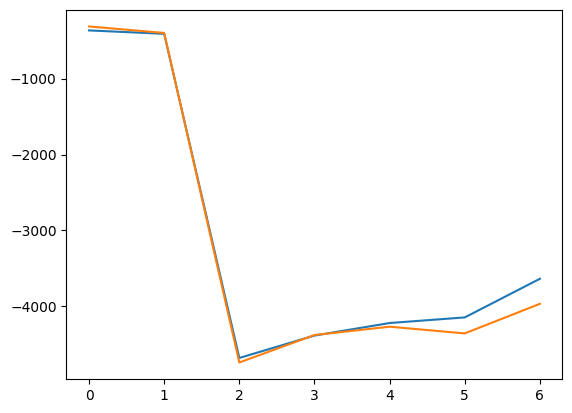

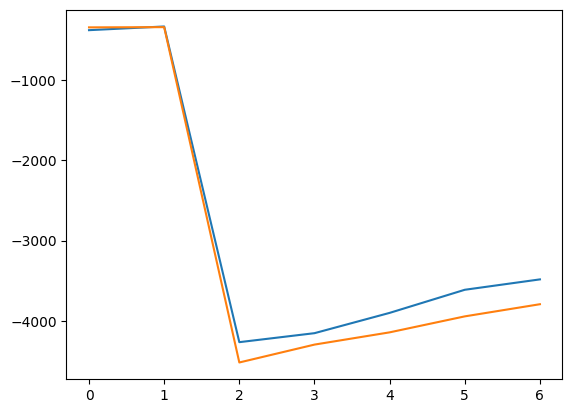

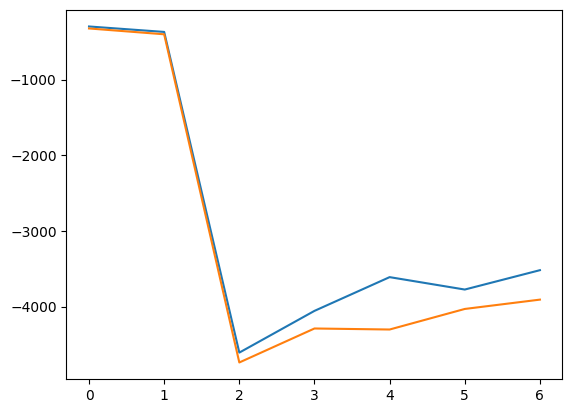

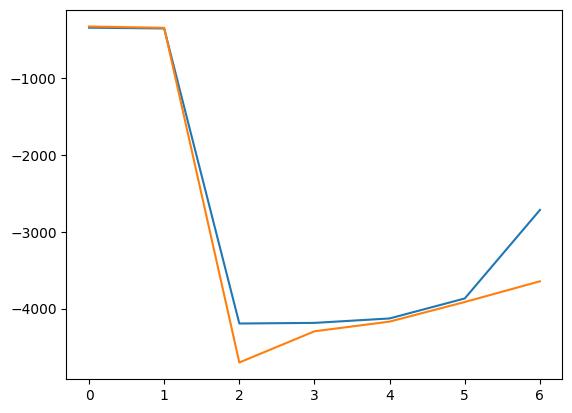

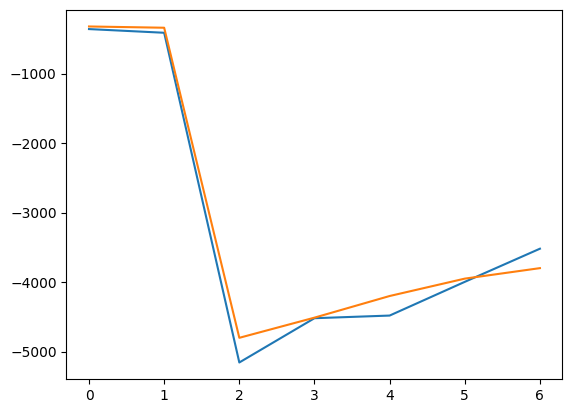

In [279]:
for i in range(7):
    plt.figure()
    plt.plot(results[0][0][i,:])
    plt.plot(results[0][1][i,:])